<a href="https://colab.research.google.com/github/jescalada/Tensorflow-colabs/blob/main/01_neural_network_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to regression with neural networks in TensorFlow
There are many definitions for a regression problem. We will simplify to: Predicting a numerical variable based on a combination of other variables.

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.12.0


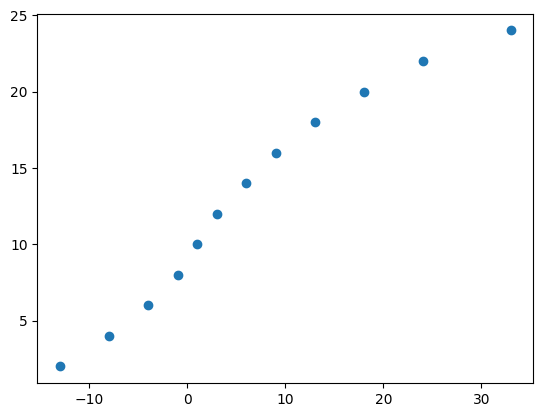

In [2]:
# Create some data to view and fit
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-13., -8., -4., -1., 1., 3., 6., 9., 13., 18., 24, 33])

# Create labels
y = np.array([2., 4., 6., 8., 10., 12., 14., 16., 18., 20., 22., 24.])

plt.scatter(X, y)

# Input and output shapes


In [3]:
# Create a demo tensor to predict the price of a house
house_info = tf.constant(["beds", "baths", "garages"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'beds', b'baths', b'garages'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

# Steps in modelling with TensorFlow
1. **Creating a model**: Define the input and output layers, as well as the hidden layers of the deep learning model
2. **Compiling the model**: Define the **loss function**, which tells the model how wrong it is, define the **optimizer** which tells the model how to improve the patterns, and define **evaluation metrics** in order to interpret the performance of the model itself
3. **Fitting the model**: Letting the model try to find patterns between X and Y (Features and labels)

In [4]:
# Set the random seed for reproducibility
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,  # Mean Absolute Error
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)



Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 12.3242 - mae: 12.3242
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 11.6964 - mae: 11.6964
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 11.0685 - mae: 11.0685
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 10.4407 - mae: 10.4407
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 9.8501 - mae: 9.8501
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 9.5170 - mae: 9.5170
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 9.1838 - mae: 9.1838
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 8.8507 - mae: 8.8507
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 8.5176 - mae: 8.5176
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 8.2747 - mae: 8.2747
Epoch 11/100
1/1 [==============================] - 0s 10ms/step

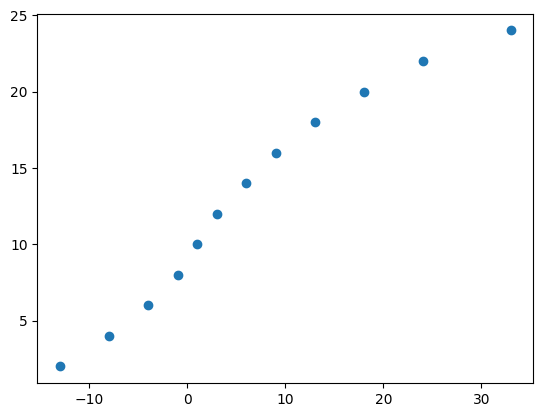

In [5]:
plt.scatter(X, y)

In [6]:
model.predict([22.])

1/1 [==============================] - 0s 80ms/step


array([[20.462257]], dtype=float32)

In [7]:
model.predict([24])

1/1 [==============================] - 0s 56ms/step


array([[22.25504]], dtype=float32)

1/1 [==============================] - 0s 32ms/step


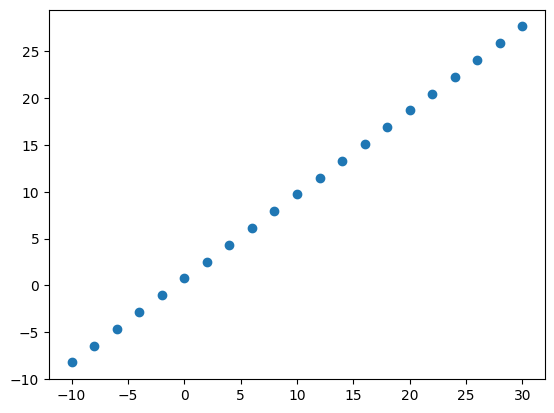

In [8]:
predictions1 = [(x, model.predict([x])) for x in range(-10, 32, 2)]
pairs = list(zip(*predictions1))
plt.scatter(pairs[0], pairs[1])

# Improving the model
Depends on the step: We can change various parameters.
1. Creation: Add more layers, increase the number of neurons, change the activation function of each layer
2. Compilation: Change the optimization function or learning rate of the optimization function
3. Fitting: Fit a model for more epochs, or more data (examples to learn from)

In [9]:
# 1. Create the new model
new_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1),
])

# 2. Compile the new model
new_model.compile(loss=tf.keras.losses.mean_squared_error,
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  metrics=["mse"])

# 3. Fit the new model
new_model.fit(tf.expand_dims(X, axis=-1), y, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 2s 2s/step - loss: 170.2227 - mse: 170.2227
Epoch 2/1000
1/1 [==============================] - 0s 12ms/step - loss: 63.3942 - mse: 63.3942
Epoch 3/1000
1/1 [==============================] - 0s 12ms/step - loss: 59.3161 - mse: 59.3161
Epoch 4/1000
1/1 [==============================] - 0s 10ms/step - loss: 59.9179 - mse: 59.9179
Epoch 5/1000
1/1 [==============================] - 0s 10ms/step - loss: 37.6583 - mse: 37.6583
Epoch 6/1000
1/1 [==============================] - 0s 10ms/step - loss: 38.3913 - mse: 38.3913
Epoch 7/1000
1/1 [==============================] - 0s 10ms/step - loss: 43.5422 - mse: 43.5422
Epoch 8/1000
1/1 [==============================] - 0s 14ms/step - loss: 42.5680 - mse: 42.5680
Epoch 9/1000
1/1 [==============================] - 0s 10ms/step - loss: 37.0275 - mse: 37.0275
Epoch 10/1000
1/1 [==============================] - 0s 11ms/step - loss: 32.5550 - mse: 32.5550
Epoch 11/1000
1/1 [====================

1/1 [==============================] - 0s 33ms/step


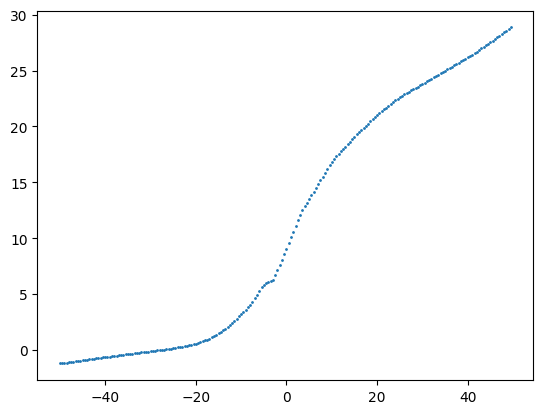

In [10]:
predictions2 = [(x, new_model.predict([x])) for x in np.arange(-50, 50, 0.5)]
pairs = list(zip(*predictions2))
plt.scatter(pairs[0], pairs[1], s=1)